In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as linalg

In [138]:
def convertToNSquaredMatrix(epsilonXY):
    Nx, Ny = epsilonXY.shape
    if Nx != Ny :
        raise NotImplementedError("Epsilon has to be a square matrix!")
    epsilonForAlgoritm = np.zeros((Nx*Ny,Nx*Ny))
    for i in range(Nx):
        for j in range(Ny):
            k=j*Ny+i
            epsilonForAlgoritm[k,k] = epsilonXY[i,j]
    return epsilonForAlgoritm

In [139]:
def buildEpsilon(epsilon0, deltaEpsilon,W, N,h):
    epsilon = epsilon0*np.identity(N*N) 
    epsilonVar = np.zeros((N*N,N*N))
    for k in range(N*N):
        i = k % N
        j = (k - i)/N
        epsilonVar[k,k] = deltaEpsilon*np.exp(-((i-((N-1)/2))**2 + (j-((N-1)/2))**2)*h**2/W**2)
    return epsilon+epsilonVar

In [140]:
def buildLaplaceOperator(N,h):
    Laplace = -4*np.diag([1 for i in range(N*N)])
    Laplace += np.diag([1 for i in range(N*N-1)],k=1)
    Laplace += np.diag([1 for i in range(N*N-1)], k=-1)
    Laplace += np.diag([1 for i in range(N*N-N)], k=N)
    Laplace += np.diag([1 for i in range(N*N-N)], k=-N)
    return Laplace/float(h)**2

In [141]:
def eigenValuesAndVectors(matrix,k):
    values, modes = linalg.eigs(matrix, k)
    return values,modes

In [160]:
def buildModeMatrix(eps, h, wavelength,N):
    lap = buildLaplaceOperator(N, h)
    return (lap+((2*np.pi/wavelength)**2)*eps)

In [147]:
def show2DMode(eigenvectors,N,k):
    for i in range(k):
        eigVector = np.abs(eigenvectors[:,i]).reshape(N,N)
        fig = plt.figure(figsize=(12,8))
        plt.imshow(eigVector, cmap="inferno")
        plt.colorbar()

In [148]:
def modeProfile3D(mode_init, eigValue, N, h):
    FieldProfile = np.zeros((N,N,N))
    FieldProfile[0,:,:] = mode_init
    for i in range(1,N):
        FieldProfile[i,:,:] = FieldProfile[i-1,:,:]*np.exp(-np.sqrt(eigValue)*h*1j)
    return FieldProfile

In [163]:
def displayModes(epsilonXY, eigenvectors, k):
    for i in range(k):
        fig = plt.figure(figsize=(12,8))
        plt.imshow(np.abs(eigenvectors[:,i]).reshape(N,N))
        plt.imshow(epsilonXY, interpolation=None, alpha=0.5)
        plt.colorbar()

In [150]:
def simulateModes(epsilonXY, eps, h, wavelength, N, k):
    modeMatrix =buildModeMatrix(eps, h=h, wavelength=wavelength, N=N)
    eigenvalues, eigenvectors = eigenValuesAndVectors(modeMatrix,k)
    displayModes(epsilonXY,eigenvectors, k)

In [151]:
def getN(length, h):
    N = int(round(length/h))
    if N%2 == 0:
        N += 1
    return N

In [152]:
#epsilon0 = 0.015
#deltaEpsilon = 2
#W = 15
#length = 100
#h= 2
#wavelength = 0.78
#k=3

In [153]:
length = 0.6
h = 0.01
wavelength = 0.4
k=5
N = getN(length, h)
radius = 0.1
midpointCircle = (0.3,0.15)

In [154]:
airBackground = np.array([1 for i in range(N*N)]).reshape(N,N)

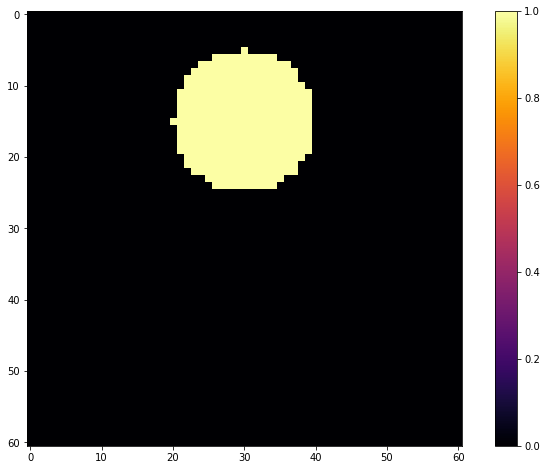

In [155]:
circle= np.zeros((N,N))
x,y = midpointCircle
for i in range(N):
    for j in range(N):
        distanceFromCenterOfCircle = np.sqrt((i*h-y)**2+(j*h-x)**2)
        if distanceFromCenterOfCircle<radius:
            circle[i,j] = 1
fig = plt.figure(figsize=(12,8))
plt.imshow(circle, cmap="inferno")
plt.colorbar()

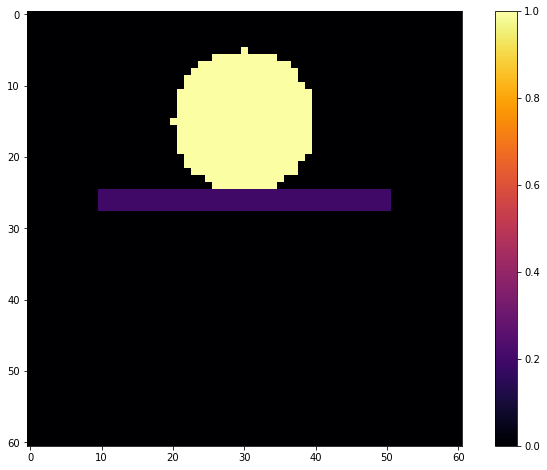

In [156]:
dielectric= np.zeros((N,N))
x,y = midpointCircle
for i in range(N):
    for j in range(N):
        if (y+radius<=i*h<=y+1.2*radius) and (x-2*radius<=j*h<=x+2*radius):
            dielectric[i,j] = 0.2
fig = plt.figure(figsize=(12,8))
plt.imshow(dielectric+circle, cmap="inferno")
plt.colorbar()

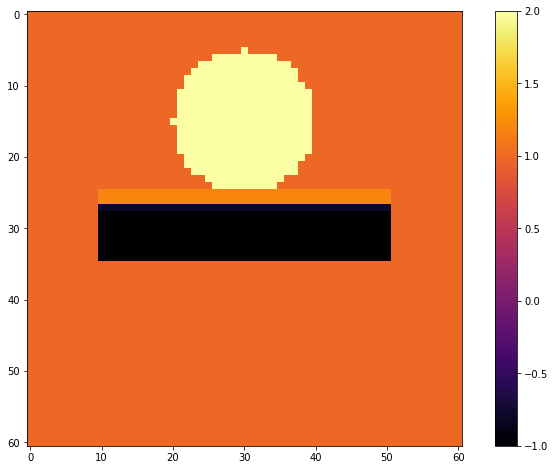

In [157]:
metal= np.zeros((N,N))
x,y = midpointCircle
for i in range(N):
    for j in range(N):
        if (y+1.2*radius<=i*h<=y+2*radius) and (x-2*radius<=j*h<=x+2*radius):
            metal[i,j] = -2
fig = plt.figure(figsize=(12,8))
plt.imshow(dielectric+circle+metal+airBackground, cmap="inferno")
plt.colorbar()

In [161]:
epsilonXY = dielectric+circle+metal+airBackground
eps = convertToNSquaredMatrix(epsilonXY)

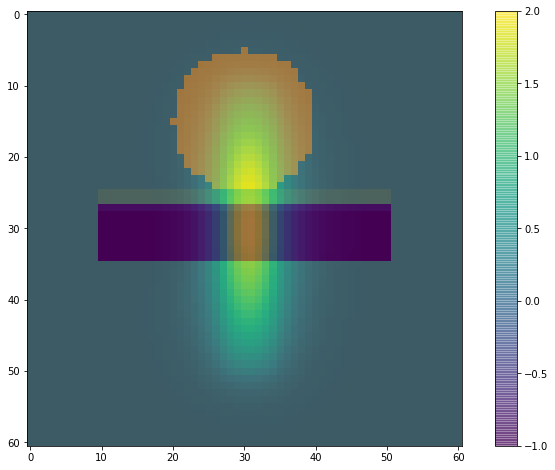

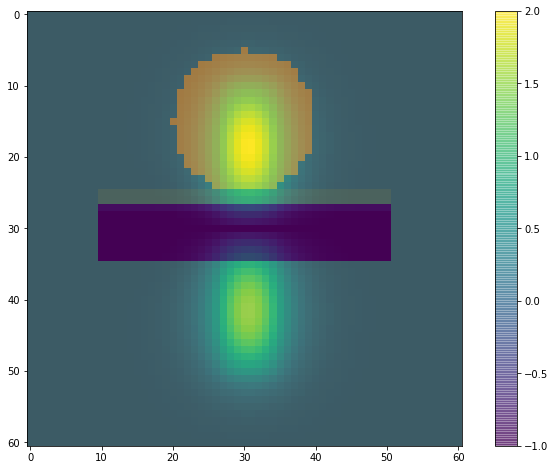

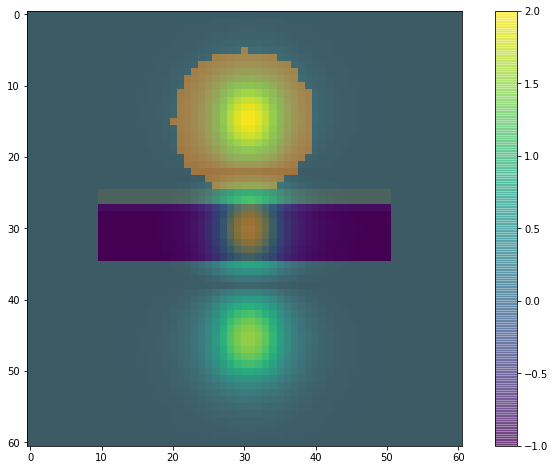

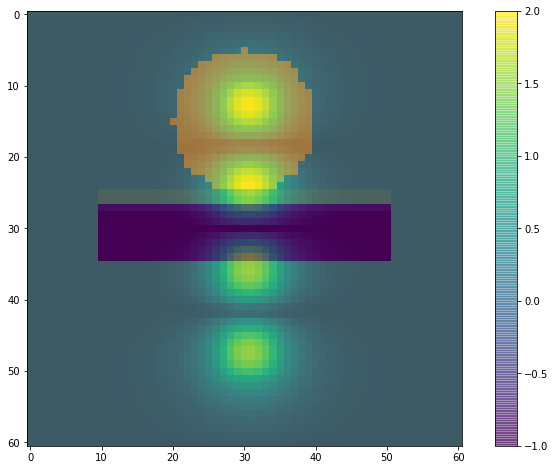

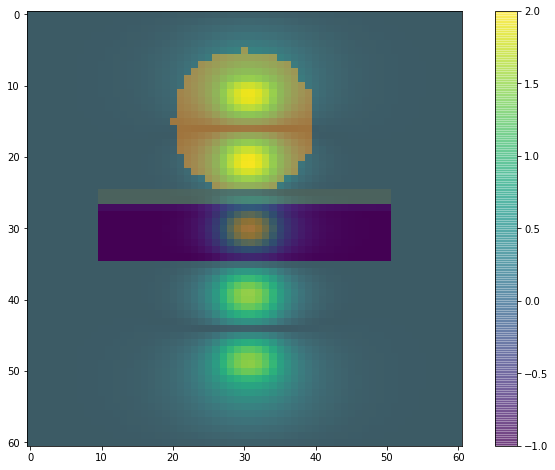

In [164]:
simulateModes(epsilonXY, eps, h, 0.2, N, k)